In [142]:
import pandas as pd
import numpy as np

In [143]:
data=pd.read_csv('/kaggle/input/df-data/train_churn.csv')

In [144]:
data.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [145]:
data.isnull().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

In [146]:
data.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,100.236235,7.631765,180.259600,99.907294,30.644682,200.173906,100.176471,17.015012,200.527882,99.839529,9.023892,10.256071,4.426353,2.769654,1.559059
std,39.698401,13.439882,54.012373,19.850817,9.182096,50.249518,19.908591,4.271212,50.353548,20.093220,2.265922,2.760102,2.463069,0.745204,1.311434
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.000000,52.000000,351.500000,165.000000,59.760000,359.300000,170.000000,30.540000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [147]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [148]:
data.drop(columns=['state','area_code'],inplace=True)

In [149]:
data.head()

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,107,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,137,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,84,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,75,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,121,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [150]:
data['total_minutes']=data['total_day_minutes']+data['total_eve_minutes']+data['total_night_minutes']
data.drop(columns=['total_day_minutes','total_eve_minutes','total_night_minutes'],inplace=True)
data['total_calls']=data['total_day_calls']+data['total_eve_calls']+data['total_night_calls']
data.drop(columns=['total_day_calls','total_eve_calls','total_night_calls'],inplace=True)
data['total_charge']=data['total_day_charge']+data['total_eve_charge']+data['total_night_charge']
data.drop(columns=['total_day_charge','total_eve_charge','total_night_charge'],inplace=True)

In [272]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   account_length                 4250 non-null   int64  
 1   international_plan             4250 non-null   int64  
 2   voice_mail_plan                4250 non-null   int64  
 3   number_vmail_messages          4250 non-null   int64  
 4   total_intl_minutes             4250 non-null   float64
 5   total_intl_calls               4250 non-null   int64  
 6   total_intl_charge              4250 non-null   float64
 7   number_customer_service_calls  4250 non-null   int64  
 8   churn                          4250 non-null   int64  
 9   total_minutes                  4250 non-null   float64
 10  total_calls                    4250 non-null   int64  
 11  total_charge                   4250 non-null   float64
dtypes: float64(4), int64(8)
memory usage: 398.6 KB


In [151]:
data.head()

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,total_minutes,total_calls,total_charge
0,107,no,yes,26,13.7,3,3.70,1,no,611.5,329,55.54
1,137,no,no,0,12.2,5,3.29,0,no,527.2,328,59.00
2,84,yes,no,0,6.6,7,1.78,2,no,558.2,248,65.02
3,75,yes,no,0,10.1,3,2.73,3,no,501.9,356,49.36
4,121,no,yes,24,7.5,7,2.03,3,no,779.3,314,76.28


In [152]:
data.head()

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,total_minutes,total_calls,total_charge
0,107,no,yes,26,13.7,3,3.70,1,no,611.5,329,55.54
1,137,no,no,0,12.2,5,3.29,0,no,527.2,328,59.00
2,84,yes,no,0,6.6,7,1.78,2,no,558.2,248,65.02
3,75,yes,no,0,10.1,3,2.73,3,no,501.9,356,49.36
4,121,no,yes,24,7.5,7,2.03,3,no,779.3,314,76.28


In [153]:
data['churn'].replace({'no':0,'yes':1},inplace=True)
data['international_plan'].replace({'no':0,'yes':1},inplace=True)
data['voice_mail_plan'].replace({'no':0,'yes':1},inplace=True)
data.head()

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,total_minutes,total_calls,total_charge
0,107,0,1,26,13.7,3,3.70,1,0,611.5,329,55.54
1,137,0,0,0,12.2,5,3.29,0,0,527.2,328,59.00
2,84,1,0,0,6.6,7,1.78,2,0,558.2,248,65.02
3,75,1,0,0,10.1,3,2.73,3,0,501.9,356,49.36
4,121,0,1,24,7.5,7,2.03,3,0,779.3,314,76.28


In [154]:
data.describe()

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,total_minutes,total_calls,total_charge
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,100.236235,0.093176,0.261647,7.631765,10.256071,4.426353,2.769654,1.559059,0.140706,580.961388,299.923294,56.683586
std,39.698401,0.290714,0.439583,13.439882,2.760102,2.463069,0.745204,1.311434,0.347759,88.823648,34.405153,10.334156
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,275.200000,188.000000,19.980000
25%,73.000000,0.000000,0.000000,0.000000,8.500000,3.000000,2.300000,1.000000,0.000000,521.125000,277.000000,49.592500
50%,100.000000,0.000000,0.000000,0.000000,10.300000,4.000000,2.780000,1.000000,0.000000,581.400000,300.000000,56.680000
75%,127.000000,0.000000,1.000000,16.000000,12.000000,6.000000,3.240000,2.000000,0.000000,640.900000,323.000000,63.447500
max,243.000000,1.000000,1.000000,52.000000,20.000000,20.000000,5.400000,9.000000,1.000000,876.900000,410.000000,92.560000


<AxesSubplot:ylabel='count'>

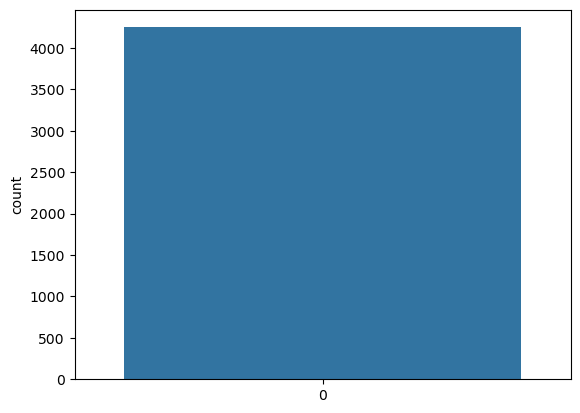

In [155]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(data['churn'],label='count')

In [156]:
print((data['churn']==0).sum(),(data['churn']==1).sum())

3652 598


In [157]:
YY=data['churn']
XX=data.drop('churn',axis=1)

In [158]:
XX.corrwith(YY)

account_length                   0.019378
international_plan               0.259053
voice_mail_plan                 -0.114643
number_vmail_messages           -0.100347
total_intl_minutes               0.055186
total_intl_calls                -0.034334
total_intl_charge                0.055177
number_customer_service_calls    0.221220
total_minutes                    0.201958
total_calls                     -0.004645
total_charge                     0.234082
dtype: float64

<AxesSubplot:title={'center':'correlated with churn'}>

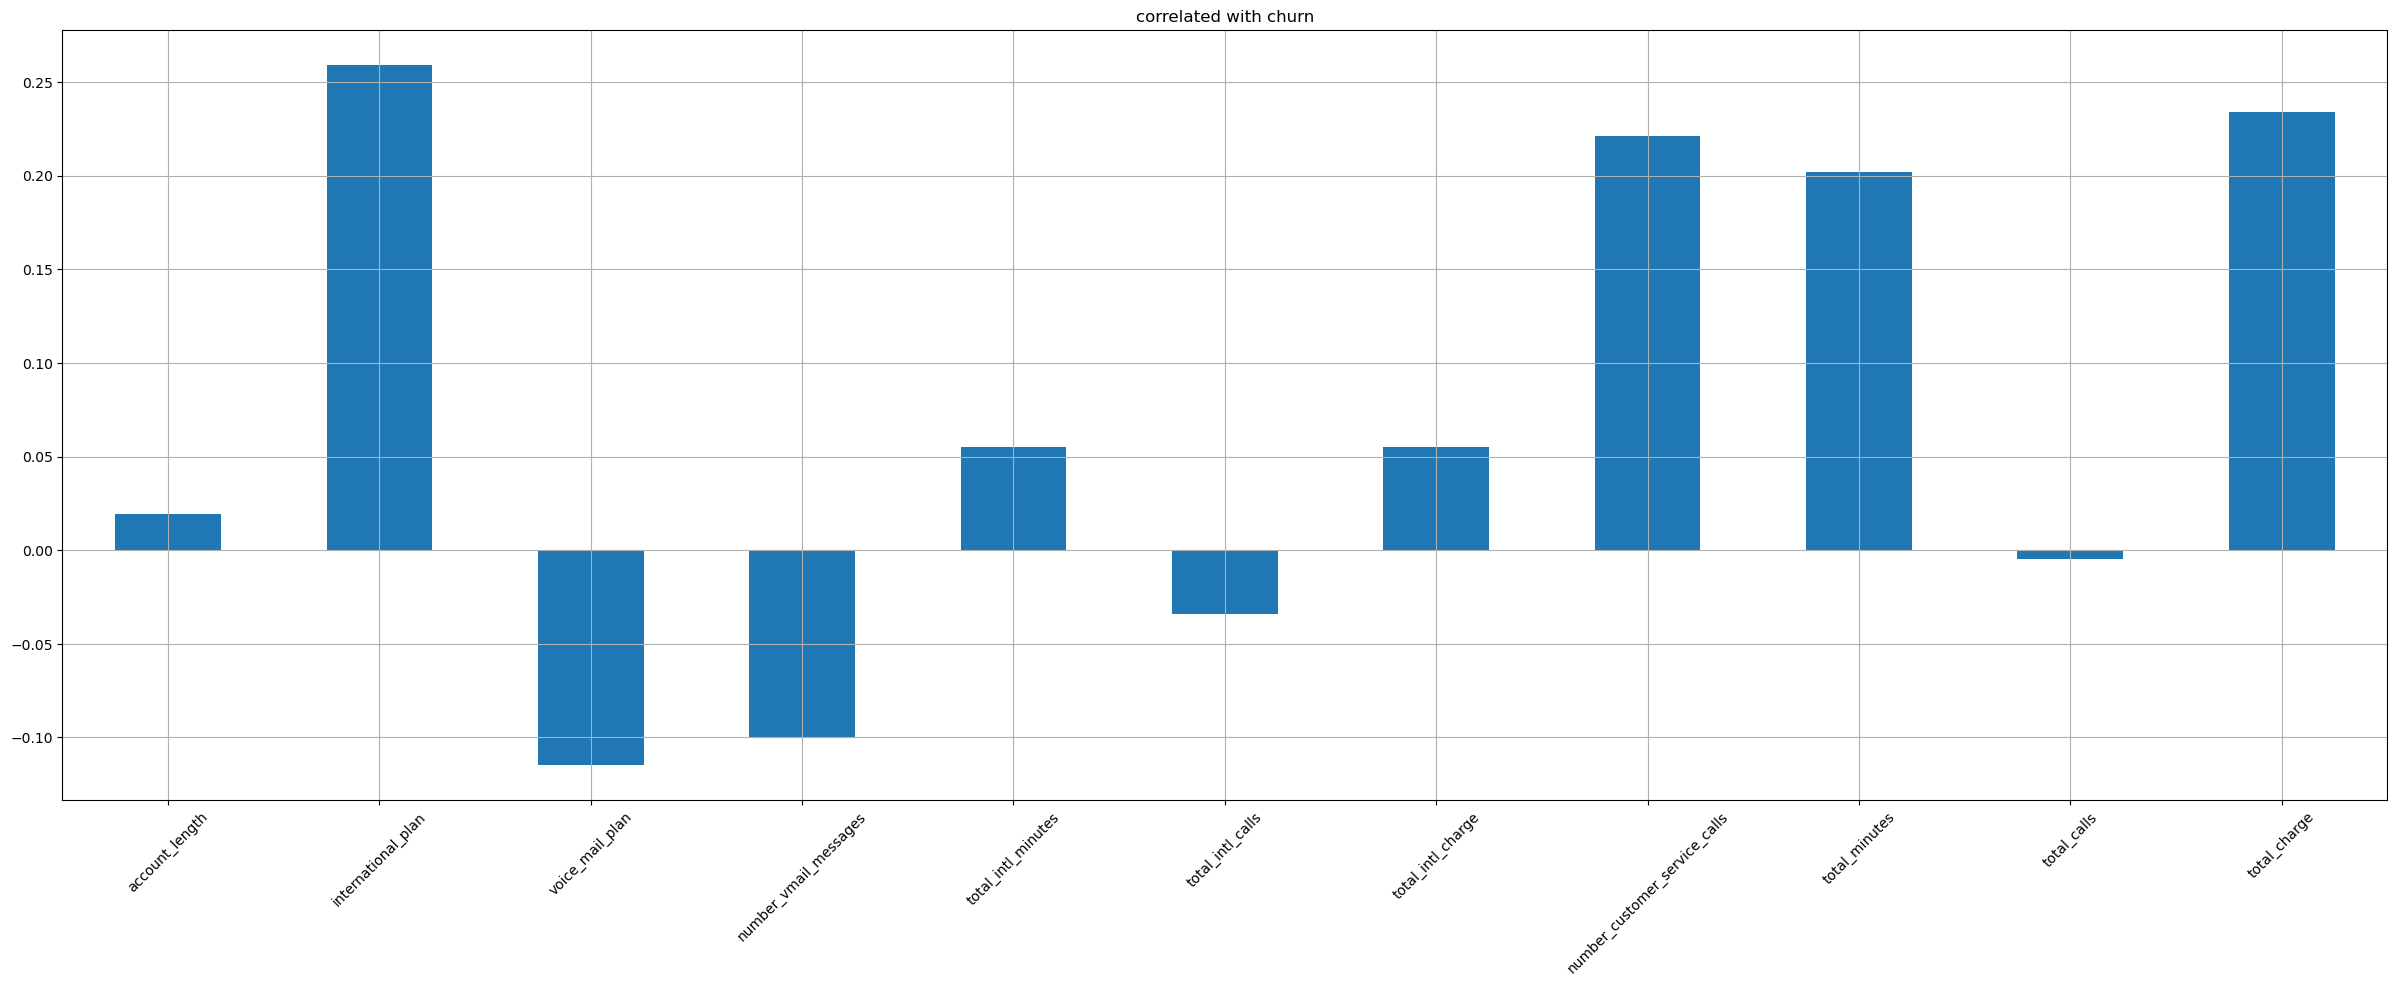

In [159]:
XX.corrwith(YY).plot.bar(
    figsize=(30,10),title='correlated with churn',rot=45,grid=True
)

In [160]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [161]:
XX=sc.fit_transform(XX)

In [162]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(XX,YY,test_size=0.25,random_state=42,stratify=YY)

## LogisticRegression

In [163]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
param={
        'C':[0.01,0.01,1,0.001,0.1],
        'penalty':['l1','l2','elasticnet'],
        'solver':['newton-cg','lbfgs','liblinear','sag','saga']
      }

In [164]:
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(lr,param,cv=5)

In [165]:
grid.fit(X_train,y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.01, 1, 0.001, 0.1],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [166]:
grid.best_params_

{'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}

In [167]:
logistic=LogisticRegression(C=1,penalty='l2',solver='liblinear')
logistic.fit(X_train,y_train)

LogisticRegression(C=1, solver='liblinear')

In [168]:
pred=logistic.predict(X_test)

In [169]:
from sklearn.metrics import confusion_matrix,accuracy_score
accuracy_score(pred,y_test)

0.8532455315145814

In [170]:
confusion_matrix(pred,y_test)

array([[875, 118],
       [ 38,  32]])

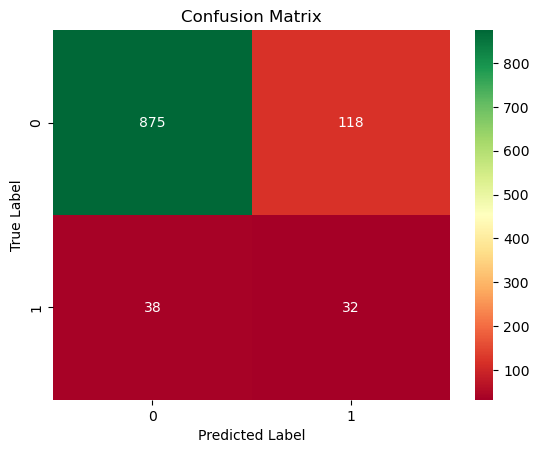

In [171]:
sns.heatmap(confusion_matrix(pred,y_test), annot=True, cmap="RdYlGn", fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [172]:
from sklearn.metrics import precision_score,recall_score

In [173]:
list1={}
list1.update(logistic=int(precision_score(pred,y_test)*100))

In [174]:
precision_score(pred,y_test)

0.21333333333333335

In [175]:
recall_score(pred,y_test)

0.45714285714285713

## import and cleaning test_data 

In [176]:
test_data=pd.read_csv('/kaggle/input/df-data/test_churn.csv')
test_data.head()

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,2,AL,118,area_code_510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,3,IA,62,area_code_415,no,no,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,4,VT,93,area_code_510,no,no,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,5,NE,174,area_code_415,no,no,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3


In [177]:
test_data.drop(columns=['state','area_code'],inplace=True)

In [178]:
test_data['total_minutes']=test_data['total_day_minutes']+test_data['total_eve_minutes']+test_data['total_night_minutes']
test_data.drop(columns=['total_day_minutes','total_eve_minutes','total_night_minutes'],inplace=True)
test_data['total_calls']=test_data['total_day_calls']+test_data['total_eve_calls']+test_data['total_night_calls']
test_data.drop(columns=['total_day_calls','total_eve_calls','total_night_calls'],inplace=True)
test_data['total_charge']=test_data['total_day_charge']+test_data['total_eve_charge']+test_data['total_night_charge']
test_data.drop(columns=['total_day_charge','total_eve_charge','total_night_charge'],inplace=True)

In [179]:
test_data['international_plan'].replace({'no':0,'yes':1},inplace=True)
test_data['voice_mail_plan'].replace({'no':0,'yes':1},inplace=True)
test_data.drop('id',axis=1,inplace=True)
test_data.head()

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,total_minutes,total_calls,total_charge
0,128,0,1,25,10.0,3,2.70,1,707.2,300,72.86
1,118,1,0,0,6.3,6,1.70,0,647.9,317,65.91
2,62,0,0,0,13.1,6,3.54,4,630.9,245,55.77
3,93,0,0,0,8.1,3,2.19,3,538.5,346,56.80
4,174,0,0,0,15.5,5,4.19,3,652.1,303,55.96


In [180]:
test_data=sc.fit_transform(test_data)

In [181]:
predictions1=logistic.predict(test_data)

## Random Forest

In [182]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [183]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [184]:
grid=GridSearchCV(rf,param_grid,cv=5)

In [185]:
grid.fit(X_train,y_train)
grid.best_params_

{'max_depth': 15,
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 50}

In [186]:
r_f=RandomForestClassifier(max_depth=15,min_samples_leaf=2,min_samples_split=5,n_estimators=50)

In [187]:
r_f.fit(X_train,y_train)

RandomForestClassifier(max_depth=15, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=50)

In [188]:
pred2=r_f.predict(X_test)

In [189]:
confusion_matrix(pred2,y_test)

array([[910,  26],
       [  3, 124]])

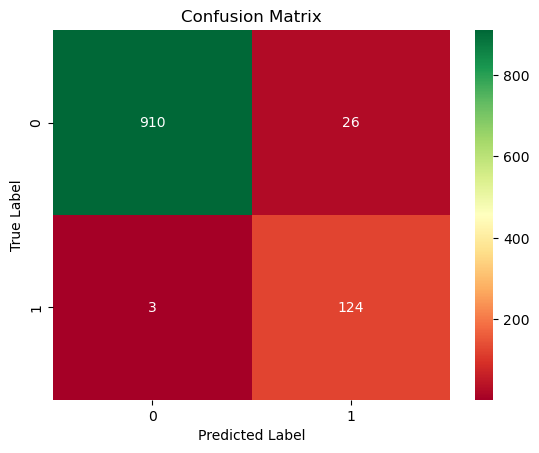

In [190]:
sns.heatmap(confusion_matrix(pred2,y_test), annot=True, cmap="RdYlGn", fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [191]:
accuracy_score(pred2,y_test)

0.9727187206020697

In [192]:
precision_score(pred2,y_test)

0.8266666666666667

In [193]:
recall_score(pred2,y_test)

0.9763779527559056

In [194]:
list1.update(Random_forest=int(precision_score(pred2,y_test)*100))

## SVM

In [195]:
from sklearn.svm import SVC
svc=SVC()

In [196]:
param_grid={
    'C':[0.1,0.01,0.001,1],
    'kernel':['sigmoid','rbf','linear'],
    'gamma':['auto']
}

In [197]:
grid=GridSearchCV(svc,param_grid,cv=5)
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 0.01, 0.001, 1], 'gamma': ['auto'],
                         'kernel': ['sigmoid', 'rbf', 'linear']})

In [198]:
grid.best_params_

{'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}

In [199]:
svcc=SVC(C=1,gamma='auto',kernel='rbf')
svcc.fit(X_train,y_train)

SVC(C=1, gamma='auto')

In [200]:
pred3=svcc.predict(X_test)

In [201]:
confusion_matrix(pred3,y_test)

array([[909,  56],
       [  4,  94]])

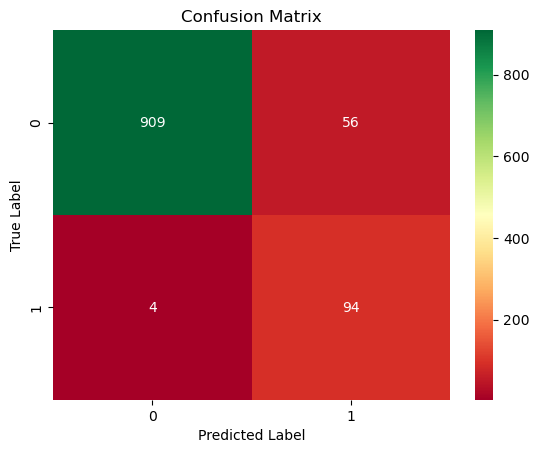

In [202]:
sns.heatmap(confusion_matrix(pred3,y_test), annot=True, cmap="RdYlGn", fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [203]:
precision_score(pred3,y_test)
list1.update(SVC=int(precision_score(pred3,y_test)*100))

In [204]:
recall_score(pred3,y_test)

0.9591836734693877

In [205]:
accuracy_score(pred3,y_test)

0.9435559736594544

## KNN

In [206]:
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier()

In [207]:
param_grid={
    'n_neighbors': [2, 3, 5,7,11],
    'weights':['distance']
}

In [208]:
grid=GridSearchCV(KNN,param_grid,cv=5)

In [209]:
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [2, 3, 5, 7, 11],
                         'weights': ['distance']})

In [210]:
grid.best_params_

{'n_neighbors': 7, 'weights': 'distance'}

In [211]:
KN_N=KNeighborsClassifier(n_neighbors=7,weights='distance')
KN_N.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7, weights='distance')

In [212]:
pred4=KN_N.predict(X_test)

In [213]:
confusion_matrix(pred4,y_test)

array([[901,  74],
       [ 12,  76]])

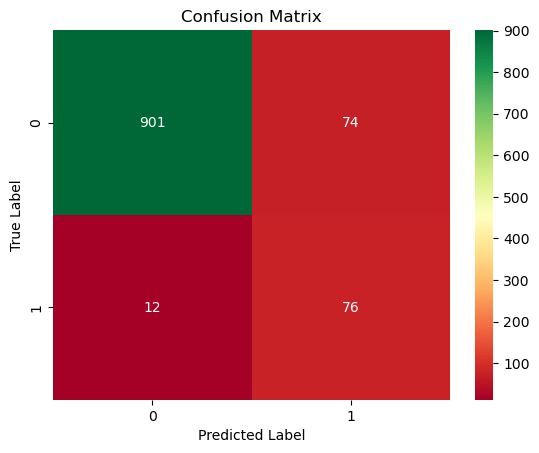

In [214]:
sns.heatmap(confusion_matrix(pred4,y_test), annot=True, cmap="RdYlGn", fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [215]:
print(precision_score(pred4,y_test),recall_score(pred4,y_test),accuracy_score(pred4,y_test))
list1.update(KNN=int(precision_score(pred4,y_test)*100))

0.5066666666666667 0.8636363636363636 0.9190968955785512


##  Bernoulli Naive Bayes

In [216]:
from sklearn.naive_bayes import BernoulliNB
BNB=BernoulliNB()

In [217]:
param_grid={
    'alpha':[0.1,0.01,1,4],
    'binarize': [0.0, 0.5, 1.0]
}

In [218]:
grid=GridSearchCV(BNB,param_grid,cv=5)

In [219]:
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=BernoulliNB(),
             param_grid={'alpha': [0.1, 0.01, 1, 4],
                         'binarize': [0.0, 0.5, 1.0]})

In [220]:
grid.best_params_

{'alpha': 1, 'binarize': 1.0}

In [221]:
B_NB=BernoulliNB(alpha=4,binarize=1)
B_NB.fit(X_train,y_train)

BernoulliNB(alpha=4, binarize=1)

In [222]:
pred5=B_NB.predict(X_test)

In [223]:
confusion_matrix(pred5,y_test)

array([[864,  85],
       [ 49,  65]])

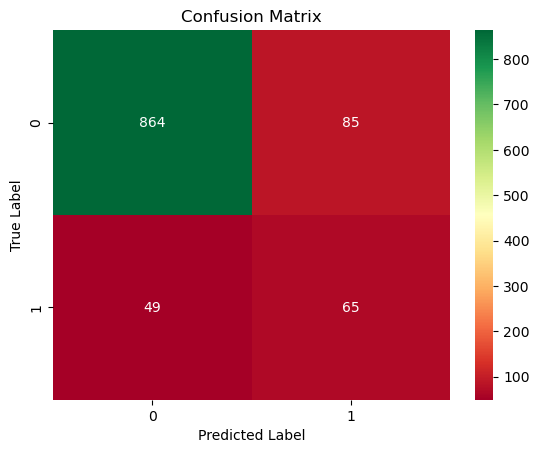

In [224]:
sns.heatmap(confusion_matrix(pred5,y_test), annot=True, cmap="RdYlGn", fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [225]:
print(precision_score(pred5,y_test),recall_score(pred5,y_test),accuracy_score(pred5,y_test))
list1.update(BernoulliNB=int(precision_score(pred5,y_test)*100))

0.43333333333333335 0.5701754385964912 0.8739416745061148


## PCA

In [226]:
from sklearn.decomposition import PCA
pca=PCA()

In [227]:
grid= GridSearchCV(pca, param_grid={'n_components': [2, 5, 8,10,11]})

In [228]:
grid.fit(X_train)

GridSearchCV(estimator=PCA(), param_grid={'n_components': [2, 5, 8, 10, 11]})

In [229]:
grid.best_params_

{'n_components': 11}

In [230]:
Pca=PCA(n_components=10)

In [231]:
X_train_pca=Pca.fit_transform(X_train)
X_test_pca=Pca.transform(X_test)

In [232]:
lr= LogisticRegression(random_state=42)
lr.fit(X_train_pca, y_train)
score = lr.score(X_test_pca, y_test)

## BaggingClassifier

In [233]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [234]:
base_estimator = DecisionTreeClassifier()

In [235]:
param_grid = {
    'n_estimators': [10, 20, 30 ,40 ,50],
    'base_estimator__max_depth': [2,3,5,7],
    'base_estimator__min_samples_split': [2,3,5,7,11]
}
B_C= BaggingClassifier(base_estimator=base_estimator)


In [236]:
grid= GridSearchCV(B_C, param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier()),
             param_grid={'base_estimator__max_depth': [2, 3, 5, 7],
                         'base_estimator__min_samples_split': [2, 3, 5, 7, 11],
                         'n_estimators': [10, 20, 30, 40, 50]})

In [237]:
grid.best_params_

{'base_estimator__max_depth': 7,
 'base_estimator__min_samples_split': 3,
 'n_estimators': 50}

In [238]:
B_E=DecisionTreeClassifier(max_depth=7,min_samples_split=3)
B_C= BaggingClassifier(base_estimator=base_estimator,n_estimators=30)

In [239]:
B_C.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=30)

In [240]:
pred7=B_C.predict(X_test)

In [241]:
confusion_matrix(pred7,y_test)

array([[908,  25],
       [  5, 125]])

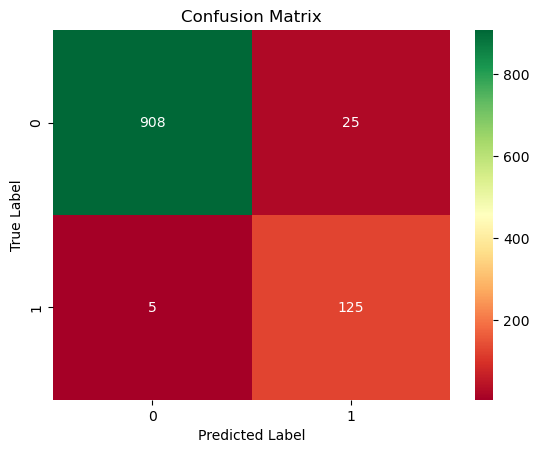

In [242]:
sns.heatmap(confusion_matrix(pred7,y_test), annot=True, cmap="RdYlGn", fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [243]:
print(precision_score(pred7,y_test),recall_score(pred7,y_test),accuracy_score(pred7,y_test))
list1.update(BaggingClassifier=int(precision_score(pred7,y_test)*100))

0.8333333333333334 0.9615384615384616 0.9717779868297272


## Neural Network

In [244]:
from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier()

In [245]:
from sklearn.model_selection import GridSearchCV
param_grid={
    'hidden_layer_sizes':[(10,),(50,),(100,)],
    'activation':['sigmoid','tanh','relu'],
    'alpha':[0.1,0.01,1,4]
}

In [246]:
grid=GridSearchCV(mlp,param_grid,cv=5)
grid.fit(X_train,y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multi

GridSearchCV(cv=5, estimator=MLPClassifier(),
             param_grid={'activation': ['sigmoid', 'tanh', 'relu'],
                         'alpha': [0.1, 0.01, 1, 4],
                         'hidden_layer_sizes': [(10,), (50,), (100,)]})

In [247]:
grid.best_params_

{'activation': 'relu', 'alpha': 0.1, 'hidden_layer_sizes': (100,)}

In [248]:
MLP=MLPClassifier(activation='relu',alpha=0.1,hidden_layer_sizes=(100,))

In [249]:
MLP.fit(X_train,y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPClassifier(alpha=0.1)

In [250]:
pred8=MLP.predict(X_test)

In [251]:
confusion_matrix(pred8,y_test)

array([[903,  46],
       [ 10, 104]])

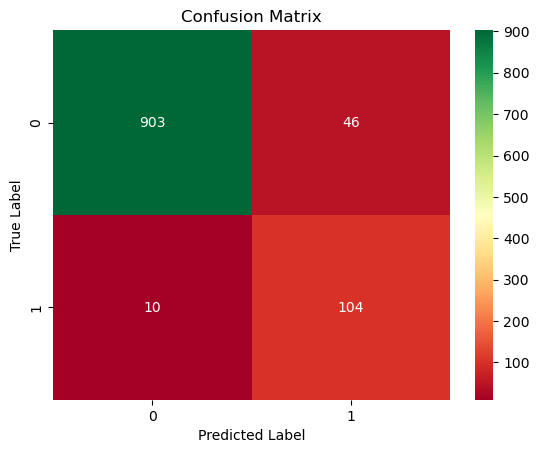

In [252]:
sns.heatmap(confusion_matrix(pred8,y_test), annot=True, cmap="RdYlGn", fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [253]:
print(precision_score(pred8,y_test),recall_score(pred8,y_test),accuracy_score(pred8,y_test))
list1.update(MLPClassifier=int(precision_score(pred8,y_test)*100))

0.6933333333333334 0.9122807017543859 0.9473189087488241


## Adaboost

In [254]:
from sklearn.ensemble import AdaBoostClassifier
base_model=DecisionTreeClassifier()
ada=AdaBoostClassifier(base_model)
param_grid={
    'n_estimators':[10,15,20,45],
    'learning_rate':[0.1,0.01,1,2]
}
grid=GridSearchCV(ada,param_grid,cv=5)
grid.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier()),
             param_grid={'learning_rate': [0.1, 0.01, 1, 2],
                         'n_estimators': [10, 15, 20, 45]})

In [255]:
grid.best_params_

{'learning_rate': 0.1, 'n_estimators': 10}

In [256]:
adaboost=AdaBoostClassifier(base_model,learning_rate=0.1,n_estimators=10)

In [257]:
adaboost.fit(X_train,y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), learning_rate=0.1,
                   n_estimators=10)

In [258]:
pred9=adaboost.predict(X_test)

In [259]:
confusion_matrix(pred9,y_test)

array([[886,  25],
       [ 27, 125]])

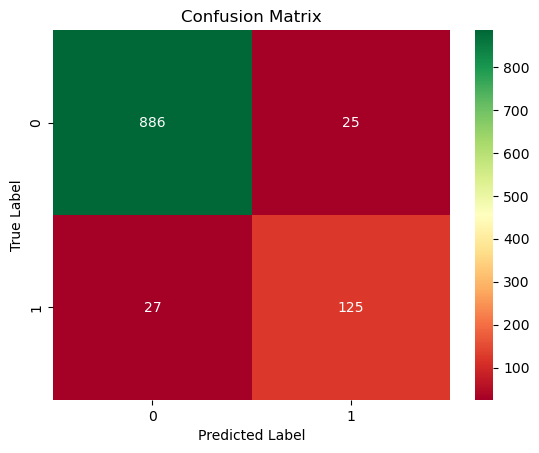

In [260]:
sns.heatmap(confusion_matrix(pred9,y_test), annot=True, cmap="RdYlGn", fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [261]:
print(precision_score(pred9,y_test),recall_score(pred9,y_test),accuracy_score(pred9,y_test))
list1.update(adaboost=int(precision_score(pred9,y_test)*100))

0.8333333333333334 0.8223684210526315 0.9510818438381938


## gradientboosting

In [262]:
from xgboost import XGBClassifier
xgb=XGBClassifier()

In [263]:
pram_grid={
    'learning_rate':[0.1,0.01,0.001],#optimise steps in gradient decent
    'n_estimators':[100,500,1000],#no of dicision tree
}

In [264]:
grid=GridSearchCV(xgb,param_grid,cv=5)
grid.fit(X_train,y_train)
grid.best_params_

{'learning_rate': 0.1, 'n_estimators': 20}

In [265]:
XGB=XGBClassifier(learning_rate=0.1,n_estimators=20)
XGB.fit(X_train,y_train)
pred10=XGB.predict(X_test)

In [266]:
confusion_matrix(pred10,y_test)

array([[908,  23],
       [  5, 127]])

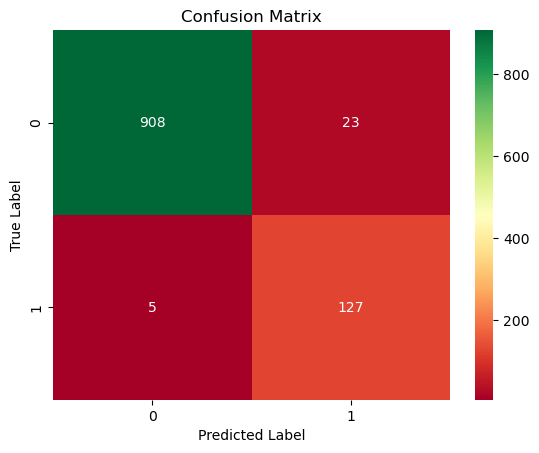

In [267]:
sns.heatmap(confusion_matrix(pred10,y_test), annot=True, cmap="RdYlGn", fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [268]:
print(precision_score(pred10,y_test),recall_score(pred10,y_test),accuracy_score(pred10,y_test))
list1.update(XGBoostClassifier=int(precision_score(pred10,y_test)*100))

0.8466666666666667 0.9621212121212122 0.973659454374412


In [269]:
print(list1)

{'logistic': 21, 'Random_forest': 82, 'SVC': 62, 'KNN': 50, 'BernoulliNB': 43, 'BaggingClassifier': 83, 'MLPClassifier': 69, 'adaboost': 83, 'XGBoostClassifier': 84}


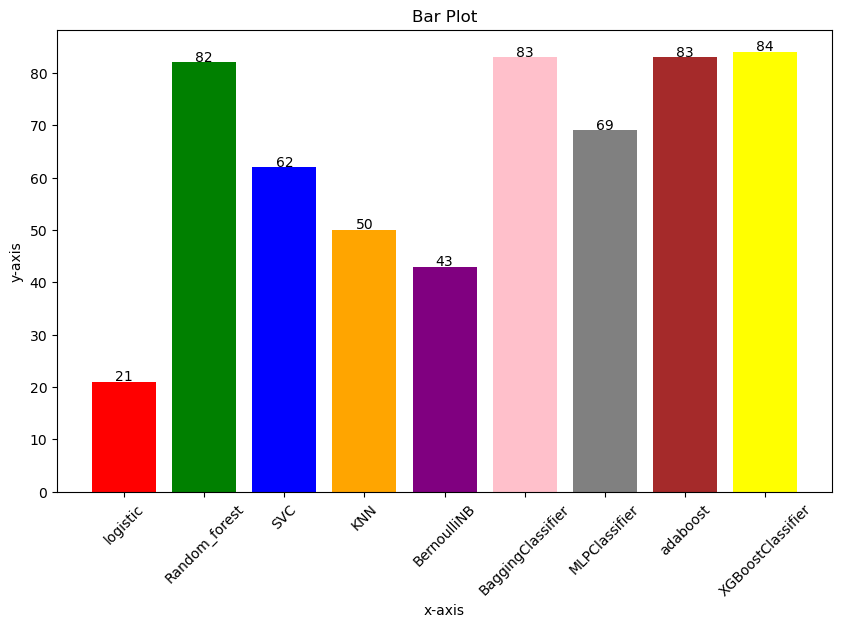

In [270]:
import matplotlib.pyplot as plt
import numpy as np
x_values = list(list1.keys())
y_values = list(list1.values())
colors = ['red', 'green', 'blue', 'orange', 'purple', 'pink', 'gray', 'brown', 'yellow', 'cyan']
fig, ax = plt.subplots(figsize=(10, 6))  # Increase the size of the figure
ax.bar(x_values, y_values, color=colors)
ax.set_title('Bar Plot')
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')

# Add text labels to each bar
for i, v in enumerate(y_values):
    ax.text(i, v+0.2, str(v), ha='center', fontsize=10)

ax.tick_params(axis='x', labelrotation=45)  # Rotate the x-axis labels for better visibility
plt.show()


## choose Random Forest based on accuracy score

In [271]:
predictions2=r_f.predict(test_data)
df2=pd.DataFrame({'id':index,'churn':predictions2})
df2['churn'].replace({0:'no',1:'yes'},inplace=True)
df2.to_csv('Output.csv',index=False)